In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder


In [6]:
# Load your data
df = pd.read_excel ('/content/Electric_Vehicle_Population_Data.xlsx')  # Adjust path if needed
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [7]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232230 entries, 0 to 232229
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         232230 non-null  object 
 1   County                                             232226 non-null  object 
 2   City                                               232226 non-null  object 
 3   State                                              232230 non-null  object 
 4   Postal Code                                        232226 non-null  float64
 5   Model Year                                         232230 non-null  int64  
 6   Make                                               232230 non-null  object 
 7   Model                                              232230 non-null  object 
 8   Electric Vehicle Type                              232230 non-null  object

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [8]:
df.drop(columns=[
    'VIN (1-10)',
    'DOL Vehicle ID',
    'Vehicle Location',
    '2020 Census Tract'
], inplace=True)


In [9]:
# Fill missing numeric values with median
df['Electric Range'].fillna(df['Electric Range'].median(), inplace=True)
df['Base MSRP'].fillna(df['Base MSRP'].median(), inplace=True)
df['Legislative District'].fillna(df['Legislative District'].mode()[0], inplace=True)

# Drop rows with missing city/county/postal
df.dropna(subset=['County', 'City', 'Postal Code'], inplace=True)


<ipython-input-9-235a38c8e344>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electric Range'].fillna(df['Electric Range'].median(), inplace=True)
<ipython-input-9-235a38c8e344>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [10]:
label_encoders = {}

for col in df.select_dtypes(include='object').columns:
    if df[col].apply(type).nunique() == 1:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le


In [11]:
Q1 = df['Electric Range'].quantile(0.25)
Q3 = df['Electric Range'].quantile(0.75)
IQR = Q3 - Q1

# Filter
df = df[(df['Electric Range'] >= Q1 - 1.5 * IQR) & (df['Electric Range'] <= Q3 + 1.5 * IQR)]


In [12]:
print("Shape after cleaning:", df.shape)
df.describe()


Shape after cleaning: (193602, 13)


,County,City,State,Postal Code,Model Year,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility
count,193602.000000,193602.000000,193602.000000,193602.000000,193602.000000,193602.000000,193602.000000,193602.000000,193602.000000,193602.000000,193602.000000,193602.000000
mean,111.730995,438.004308,41.953792,98183.208588,2021.951576,28.595293,0.245555,0.939536,11.234212,408.550118,28.737823,61.021534
std,46.118842,235.747369,1.211927,2470.340323,2.835731,13.143530,0.430417,0.537969,21.000387,4969.139760,14.931011,19.325107
min,0.000000,0.000000,0.000000,1731.000000,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,91.000000,226.000000,42.000000,98052.000000,2022.000000,17.000000,0.000000,1.000000,0.000000,0.000000,17.000000,57.000000
50%,91.000000,499.000000,42.000000,98126.000000,2023.000000,37.000000,0.000000,1.000000,0.000000,0.000000,32.000000,73.000000
75%,144.000000,628.000000,42.000000,98375.000000,2024.000000,39.000000,0.000000,1.000000,19.000000,0.000000,42.000000,74.000000
max,208.000000,785.000000,44.000000,99577.000000,2025.000000,44.000000,1.000000,2.000000,95.000000,845000.000000,49.000000,75.000000


In [13]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 193602 entries, 2 to 232229
Data columns (total 13 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             193602 non-null  int64  
 1   City                                               193602 non-null  int64  
 2   State                                              193602 non-null  int64  
 3   Postal Code                                        193602 non-null  float64
 4   Model Year                                         193602 non-null  int64  
 5   Make                                               193602 non-null  int64  
 6   Model                                              193602 non-null  object 
 7   Electric Vehicle Type                              193602 non-null  int64  
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  193602 non-null  int64  
 9 

,0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Electric Range,0


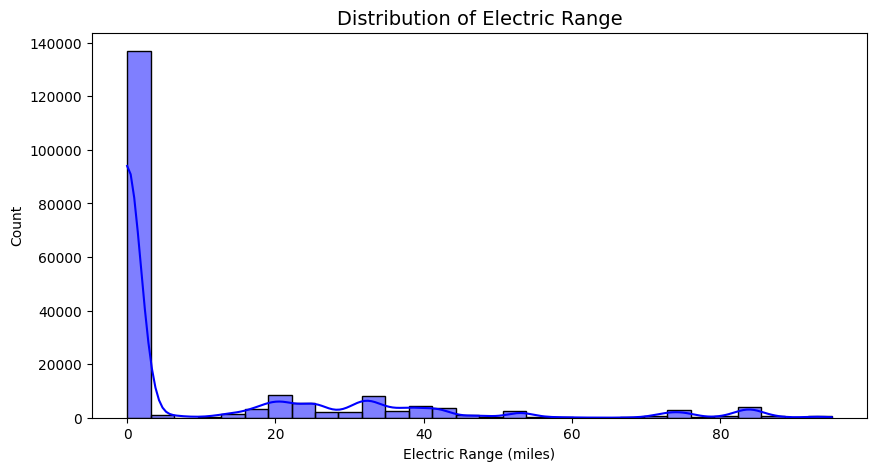

In [14]:
# Plot histogram for Electric Range
plt.figure(figsize=(10, 5))
sns.histplot(df['Electric Range'].dropna(), bins=30, kde=True, color='blue')
plt.title("Distribution of Electric Range", fontsize=14)
plt.xlabel("Electric Range (miles)")
plt.ylabel("Count")
plt.show()


<ipython-input-15-41d9b4bb53cd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette="viridis")


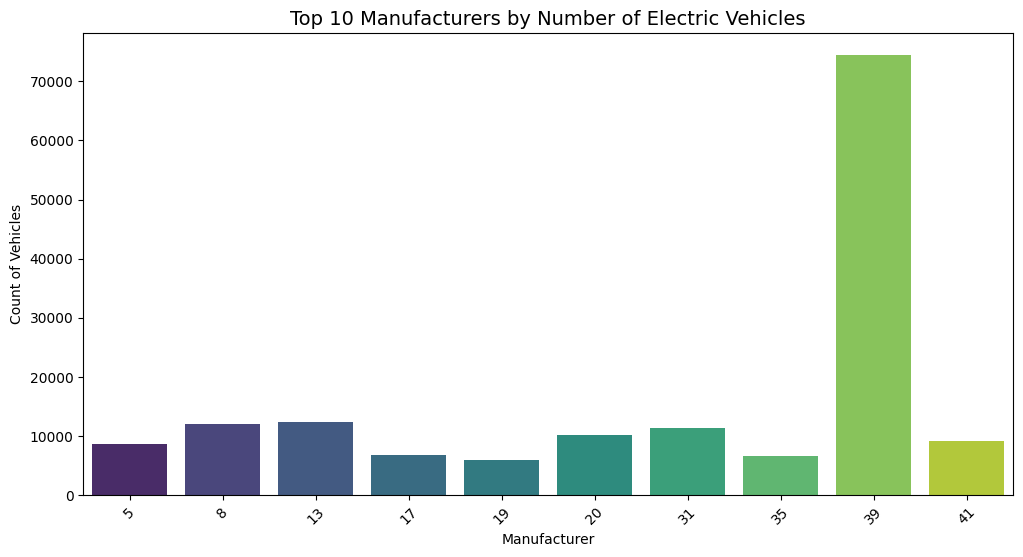

In [15]:
# Count of vehicles by manufacturer (Top 10)
plt.figure(figsize=(12, 6))
top_makes = df['Make'].value_counts().head(10)

sns.barplot(x=top_makes.index, y=top_makes.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Manufacturers by Number of Electric Vehicles", fontsize=14)
plt.xlabel("Manufacturer")
plt.ylabel("Count of Vehicles")
plt.show()


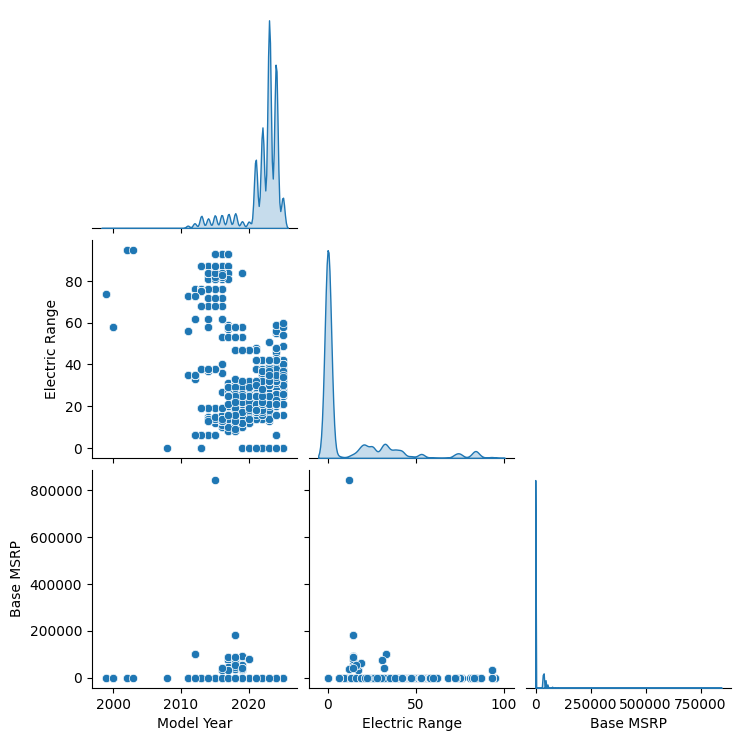

In [16]:
# Selecting key numerical variables
num_cols = ["Model Year", "Electric Range", "Base MSRP"]

# Pairplot to visualize relationships
sns.pairplot(df[num_cols].dropna(), diag_kind="kde", corner=True)
plt.show()


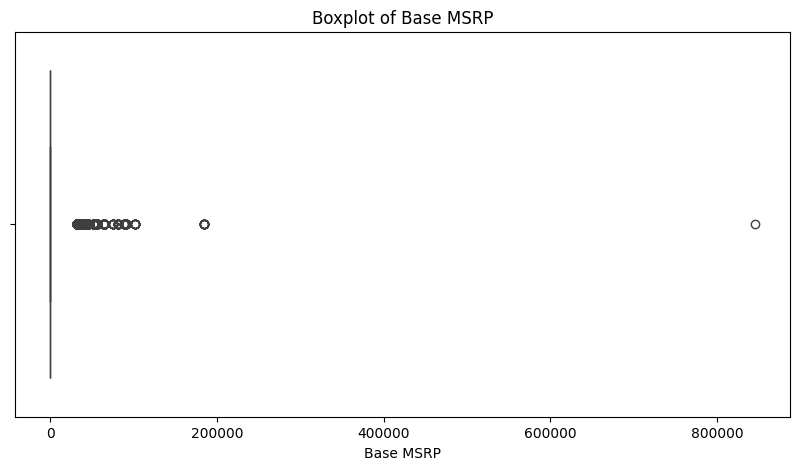

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Base MSRP"])
plt.title("Boxplot of Base MSRP")
plt.show()


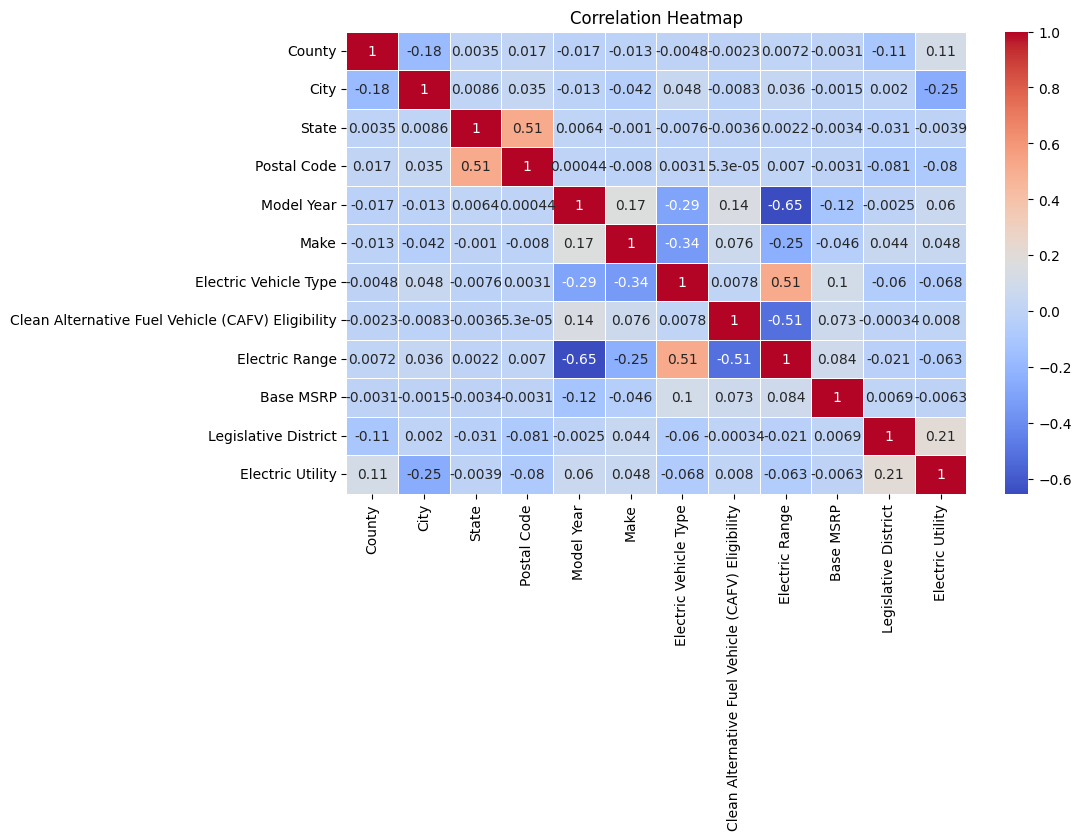

In [19]:
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



<ipython-input-58-bd38146e76e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Electric Vehicle Type"], order=df["Electric Vehicle Type"].value_counts().index, palette="coolwarm")


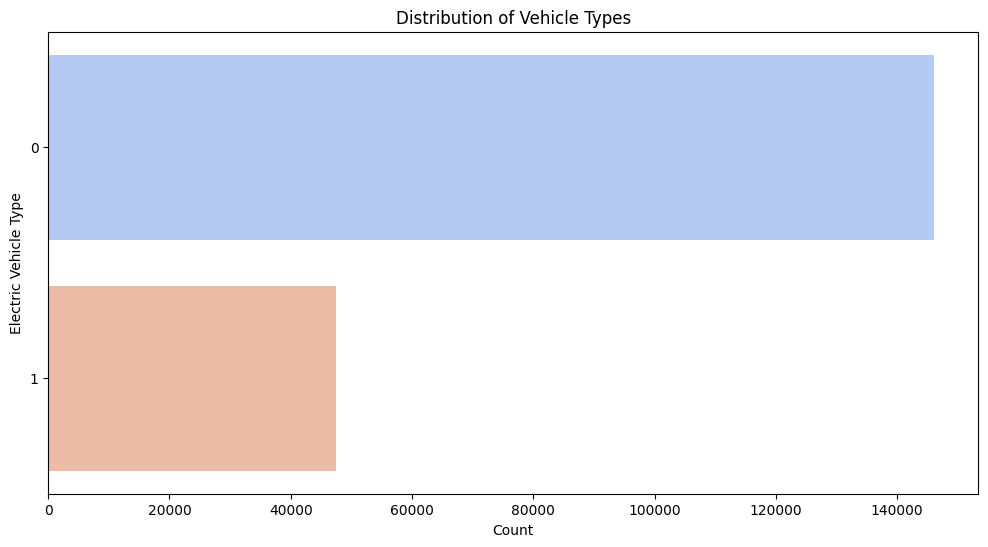

In [58]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df["Electric Vehicle Type"], order=df["Electric Vehicle Type"].value_counts().index, palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Electric Vehicle Type")
plt.title("Distribution of Vehicle Types")
plt.show()


<ipython-input-59-675bf95ee940>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df["Model Year"], y=df["Electric Range"], ci=None, marker="o", color='green')


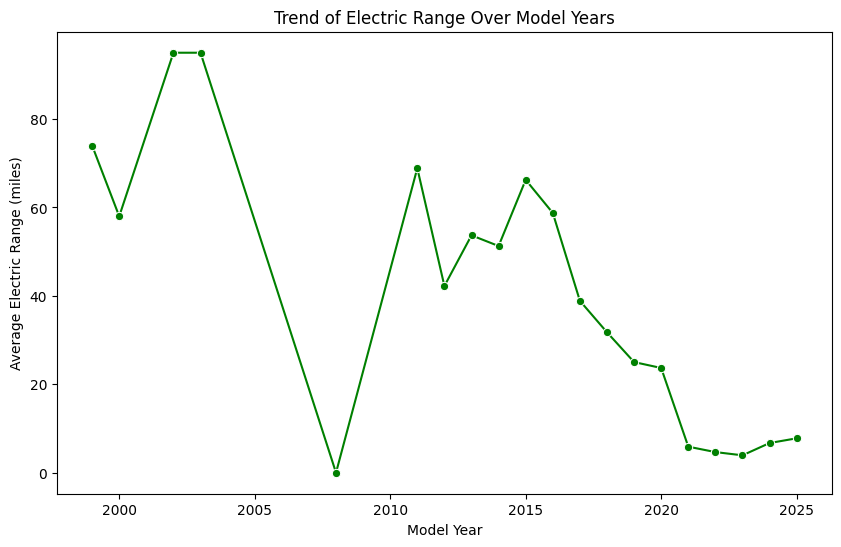

In [59]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df["Model Year"], y=df["Electric Range"], ci=None, marker="o", color='green')
plt.xlabel("Model Year")
plt.ylabel("Average Electric Range (miles)")
plt.title("Trend of Electric Range Over Model Years")
plt.show()


<ipython-input-65-1ecb7e216b87>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[df["Make"].isin(top_makes)]["Make"], y=df["Electric Range"], palette="Set2")


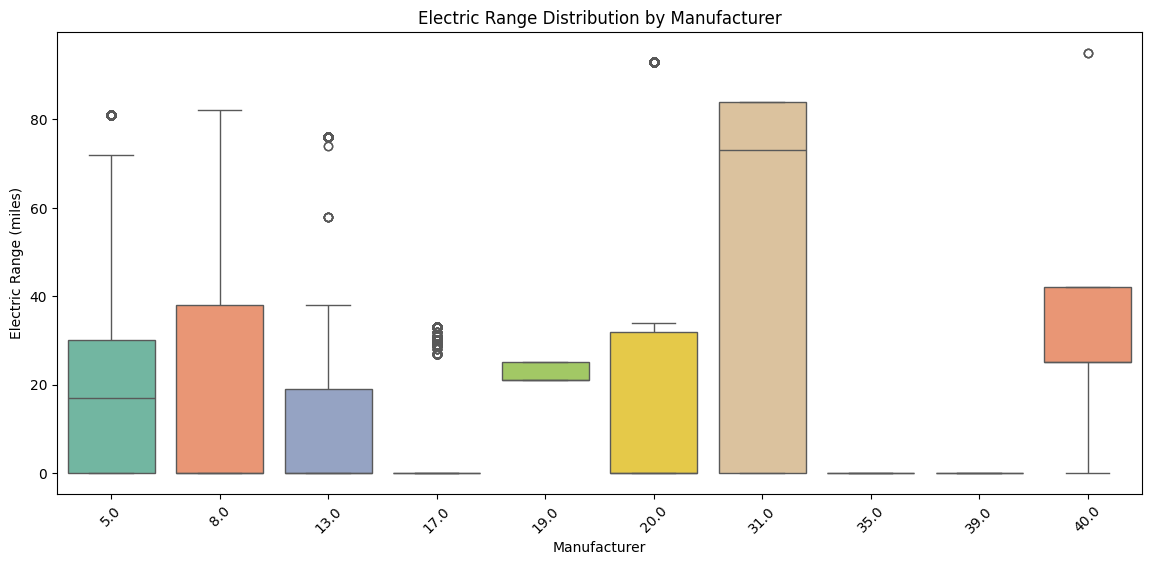

In [65]:
plt.figure(figsize=(14, 6))
top_makes = df["Make"].value_counts().index[:10]  # Top 10 manufacturers
sns.boxplot(x=df[df["Make"].isin(top_makes)]["Make"], y=df["Electric Range"], palette="Set2")
plt.xticks(rotation=45)
plt.xlabel("Manufacturer")
plt.ylabel("Electric Range (miles)")
plt.title("Electric Range Distribution by Manufacturer")
plt.show()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import joblib

In [41]:
# Drop irrelevant columns
drop_cols = ["VIN (1-10)", "Vehicle Location", "State", "City"]  # Adjust based on dataset
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Encode categorical variables
cat_cols = ["Make", "Electric Vehicle Type"]  # Modify based on available columns
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

# Drop missing values
df.dropna(inplace=True)

# Select features and target
features = ["Model Year", "Base MSRP", "Make", "Electric Vehicle Type"]
target = "Electric Range"

X = df[features]
y = df[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data Preprocessing Done!")

✅ Data Preprocessing Done!


In [43]:
from sklearn.model_selection import RandomizedSearchCV
import time

# Define XGBoost model
xgb = XGBRegressor(random_state=42)

# Define hyperparameter space (wider range, fewer trials)
param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0]
}

# Randomized search
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='r2',
                                   n_jobs=-1, random_state=42)

# Track execution time
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Best model
best_xgb = XGBRegressor(**random_search.best_params_, random_state=42)
best_xgb.fit(X_train, y_train)

print(f"✅ Best Parameters: {random_search.best_params_}")
print(f"⏳ Time Taken: {end_time - start_time:.2f} seconds")


✅ Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1}
⏳ Time Taken: 55.53 seconds


In [44]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on test set
y_pred = best_xgb.predict(X_test)

# Compute metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📊 R² Score: {r2:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.2f}")


📊 R² Score: 0.9925
📉 Mean Absolute Error (MAE): 0.37
📉 Root Mean Squared Error (RMSE): 1.81


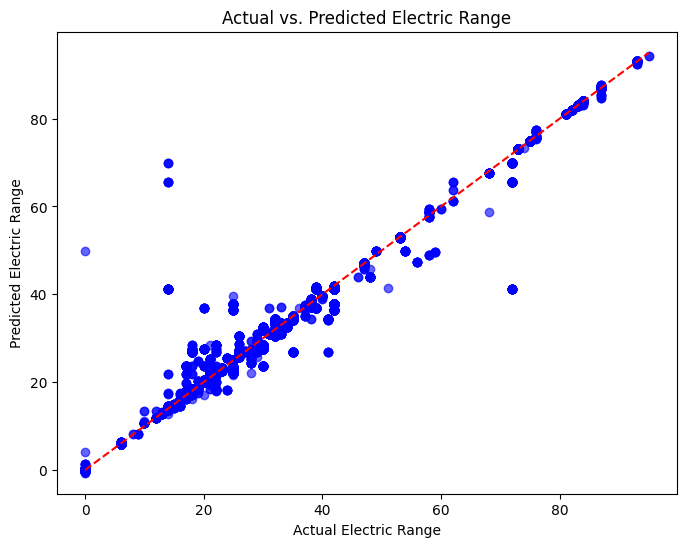

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # 45-degree line
plt.xlabel("Actual Electric Range")
plt.ylabel("Predicted Electric Range")
plt.title("Actual vs. Predicted Electric Range")
plt.show()


In [53]:
# Improved results table with more insights
results = pd.DataFrame({
    'Actual Range': y_test,
    'Predicted Range': y_pred,
    'Absolute Error': abs(y_test - y_pred),
    'Percentage Error (%)': abs(y_test - y_pred) / (y_test + 1e-5) * 100  # Avoid division by zero
})
def calculate_percentage_error(actual, predicted):
    if actual == 0:
        return "N/A"  # Avoid huge misleading values
    return abs(actual - predicted) / actual * 100

results['Percentage Error (%)'] = results.apply(lambda row: calculate_percentage_error(row['Actual Range'], row['Predicted Range']), axis=1)



# Display results
print(results.head(10))



        Actual Range  Predicted Range  Absolute Error Percentage Error (%)
31909            0.0         0.001478        0.001478                  N/A
200035          53.0        52.994175        0.005825             0.010991
37831           76.0        76.109200        0.109200             0.143684
220855           0.0         0.001478        0.001478                  N/A
47118            0.0         0.002854        0.002854                  N/A
41898           35.0        34.269695        0.730305             2.086585
182435          35.0        35.038673        0.038673             0.110495
68055            0.0         0.001478        0.001478                  N/A
72465           39.0        36.935501        2.064499             5.293587
113318           0.0        -0.000669        0.000669                  N/A
